# Blueberry Yield Prediction and Exploration

## Approach:

#### 1. Read data
#### 2. Dataset info and description
#### 3. Null values check (missing values) 
#### 4. Feature distribution
#### 5. Outliers (Box-plots)
#### 6. EDA (exploratory data analysis)
#### 7. Splitting data, feature engineering and transformation
#### 8. Transformation pipeline
#### 9. Model development: training and model validation
#### 10. Predcitions and accuracy assessment on new data
#### 11. MLOps strategy

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
from pandas.plotting import scatter_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

In [28]:
train_dataset = pd.read_csv("../data/train.csv")
test_dataset = pd.read_csv("../data/test.csv")
initial_df = pd.read_csv("../data/WildBlueberryPollinationSimulationData.csv")

In [29]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [30]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitmass          

In [31]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

Three approaches can be adopted when training and testing the model: 
    
- Use the initial_df that has 18 columns plus the target column
- Use the train data and the test data for training and testing respectively
- Split the train data into test and train and avoid using the test data completely

The dataframes has no null values, from the information above.

In [32]:
initial_df =  initial_df.drop(["Row#"],axis=1).reset_index()
initial_df.set_index('index',inplace=True)

In [40]:
train_dataset.set_index('id',inplace=True)
test_dataset.set_index('id',inplace=True)

In [33]:
initial_df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [41]:
print("Shape of original dataframe: {}".format(initial_df.shape))
print("Shape of test data: {}".format(test_dataset.shape))
print("Shape of the train data: {}".format(train_dataset.shape))

Shape of original dataframe: (777, 17)
Shape of test data: (10194, 16)
Shape of the train data: (15289, 17)


##### The approach I willadopt for this use case is to use the original data frame as id does not have synthetic data (generated data), and I will be able to test the models by having a train data and a test data too.



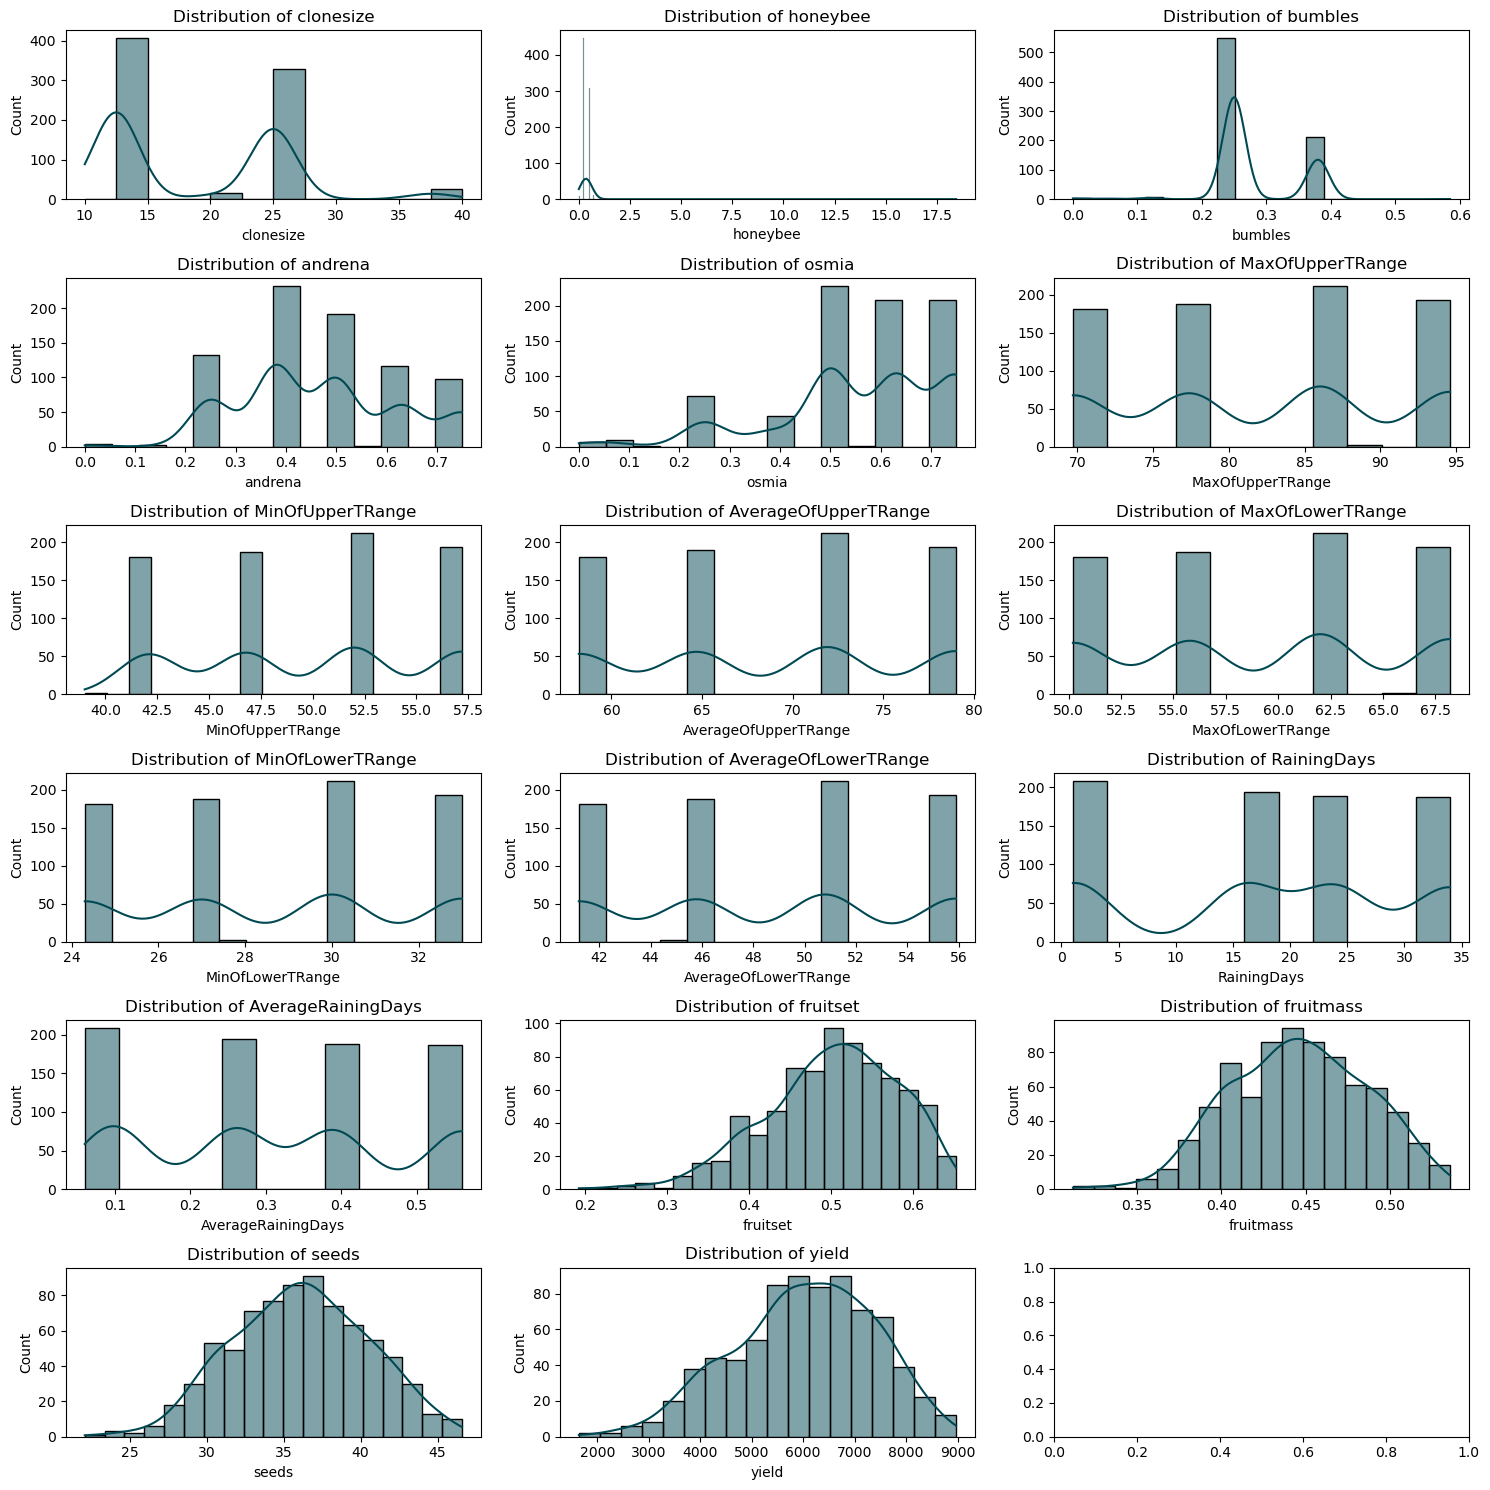

In [51]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

## Plot the distribution of the columns of the initial dataframe
for i, column in enumerate(initial_df.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(initial_df[column],ax=ax, kde=True, color="#004953",)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    
plt.tight_layout()
plt.show()

In [60]:
## Add spines to our plots

def add_spines(color="#425169",linewidth=2):
    ax= plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines[['bottom','left','right']].set_color(color)
    ax.spines[['bottom','left','top','right']].set_linewidth(linewidth)
    
## contingency table    
def cross_df(df, col1, col2):
    crossdf = pd.crosstab(df[col1], df[col2], margins=True, margins_name='Total')
    crossdf = crossdf.reset_index()
    return crossdf
    

In [64]:
initial_df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'log_honeybee'],
      dtype='object')

#### Pairplots and correlation matrix

In [65]:
subset_a = initial_df[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange','yield']]

subset_b = initial_df[['MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']]


<Figure size 1500x1500 with 0 Axes>

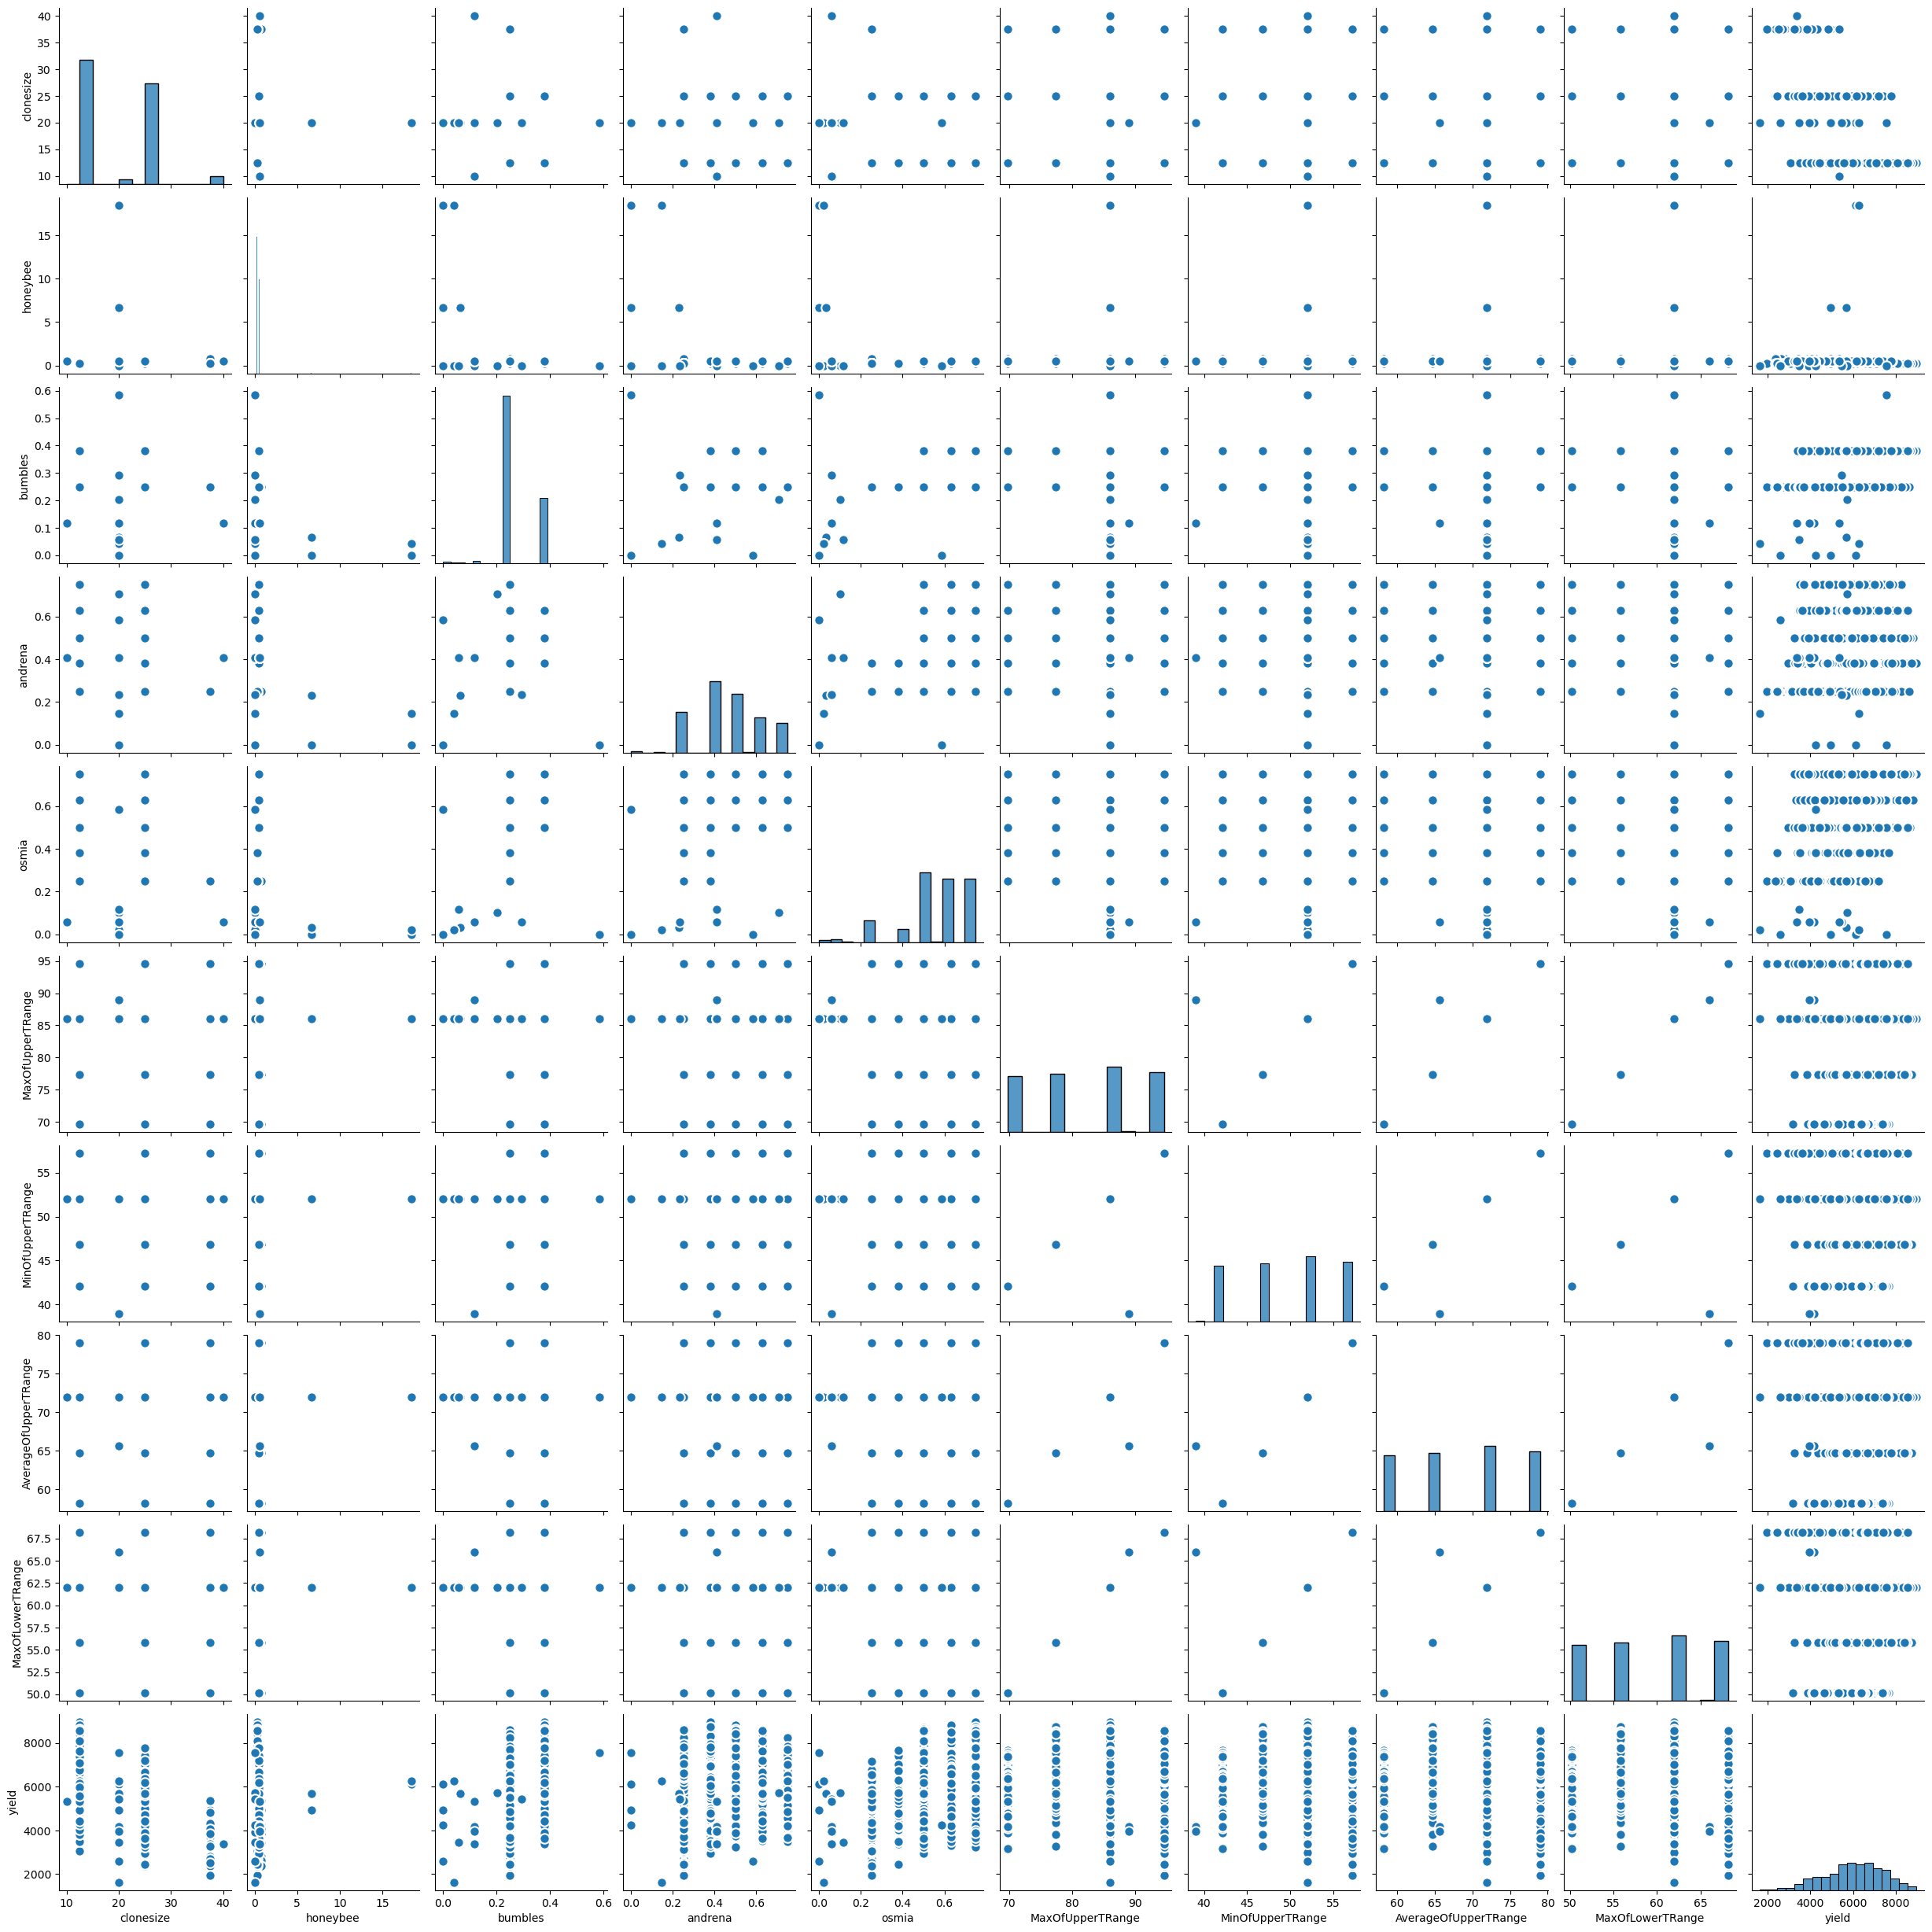

In [77]:
plt.figure(figsize=(15,15), dpi=100)
sns.pairplot(subset_a,kind="scatter", plot_kws=dict(s=80, edgecolor="white",linewidth=1.5))
plt.show()

<Figure size 1500x1500 with 0 Axes>

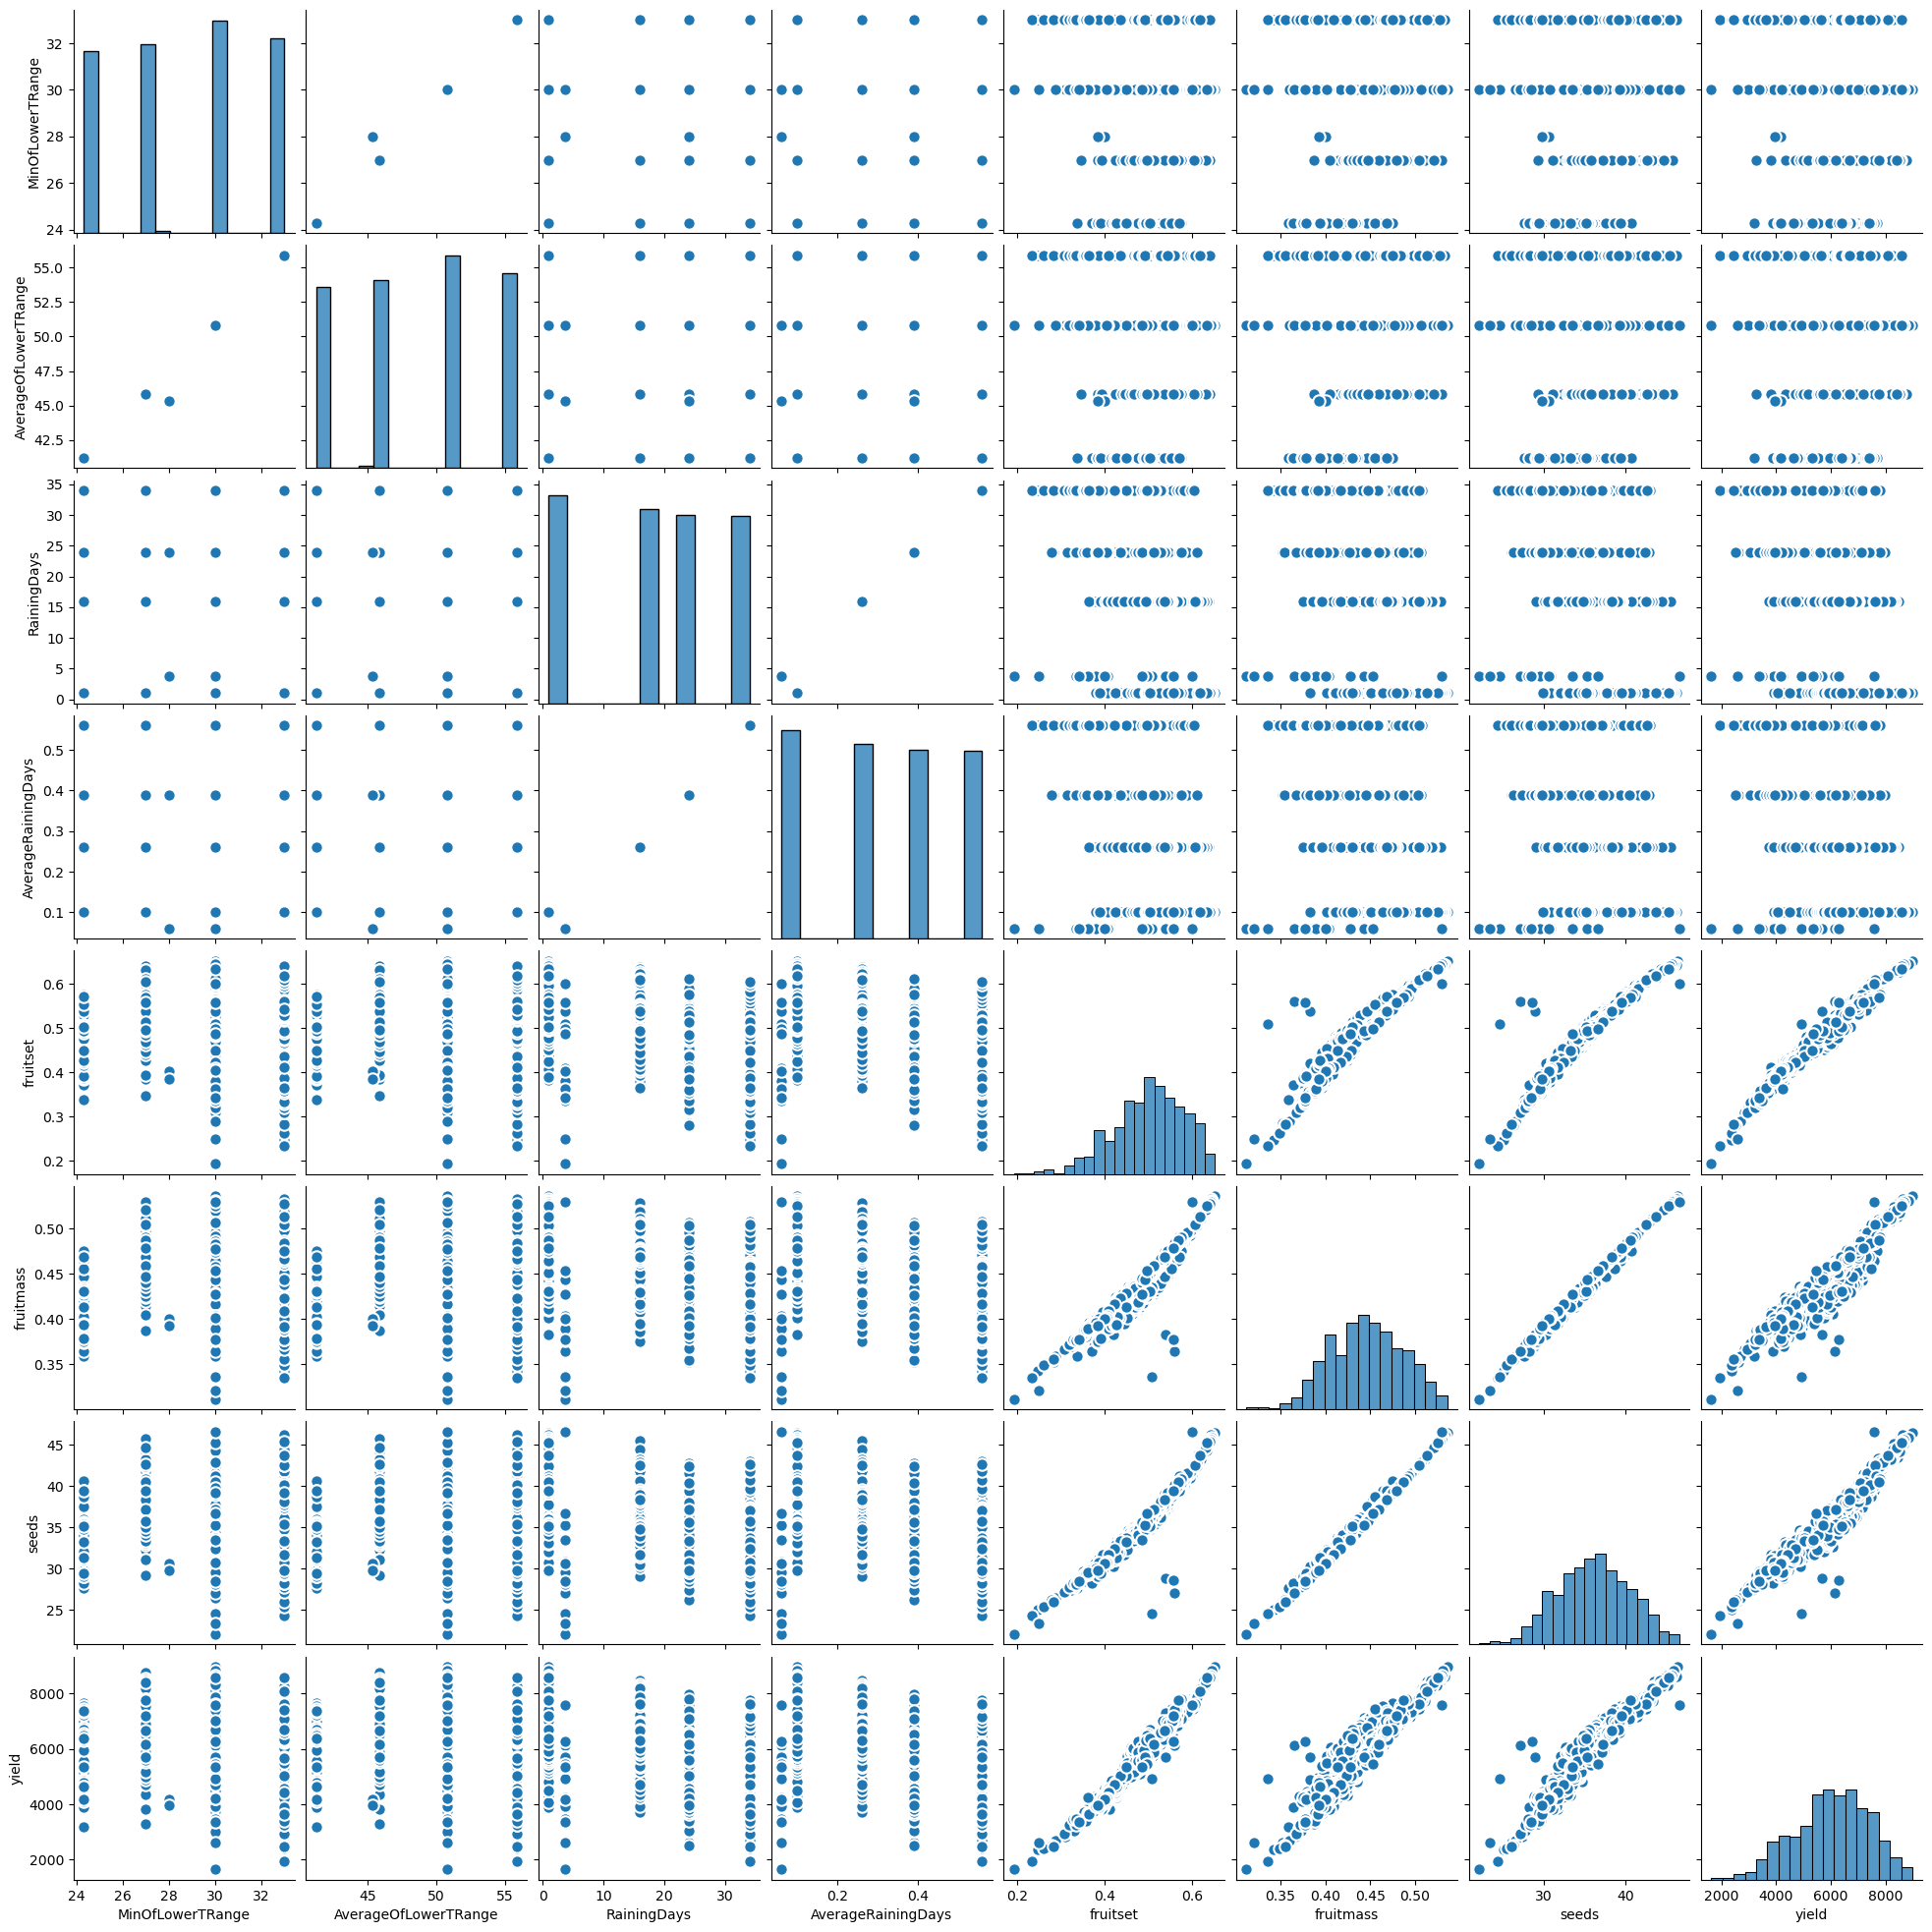

In [78]:
plt.figure(figsize=(15,15), dpi=100)
sns.pairplot(subset_b,kind="scatter", plot_kws=dict(s=80, edgecolor="white",linewidth=1.5))
plt.show()

In [66]:
corr_matrix = initial_df.corr()
corr_matrix["yield"].sort_values(ascending=False)

yield                   1.000000
fruitset                0.984081
seeds                   0.961249
fruitmass               0.930365
osmia                   0.380892
bumbles                 0.309407
andrena                 0.140277
honeybee               -0.044250
MinOfUpperTRange       -0.175883
AverageOfLowerTRange   -0.181293
AverageOfUpperTRange   -0.181774
MinOfLowerTRange       -0.183339
MaxOfUpperTRange       -0.187075
MaxOfLowerTRange       -0.187439
log_honeybee           -0.290860
clonesize              -0.516737
RainingDays            -0.540069
AverageRainingDays     -0.541215
Name: yield, dtype: float64

From this correlation matrix we can see that the fruitset, seeds and fruitmass have a very high correlatin with the target 
column ehich is **yield**.

This means that any model can actually predict yield accurately with just three features, and hence it would be a very good
practice to remove these three features from the dataframe when carrying out prediction.

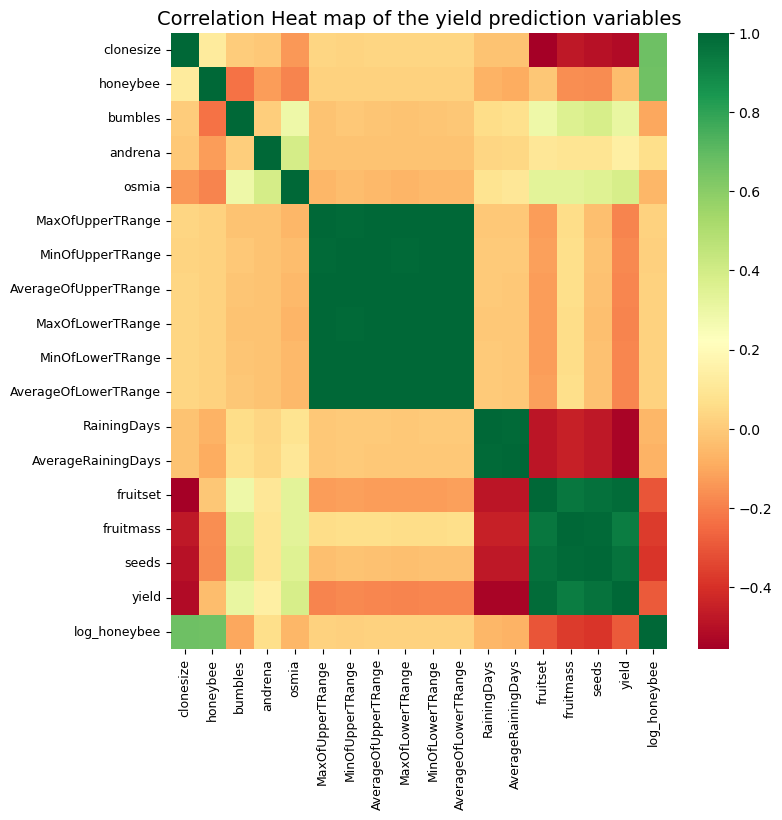

In [76]:
fig, ax = plt.subplots(1, figsize = (8,8))
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns, yticklabels=corr_matrix.columns, cmap="RdYlGn",)
plt.title("Correlation Heat map of the yield prediction variables", fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

##### We can narrow down to see the regression plot of  fruitset, fruitmass and seeds against the yield

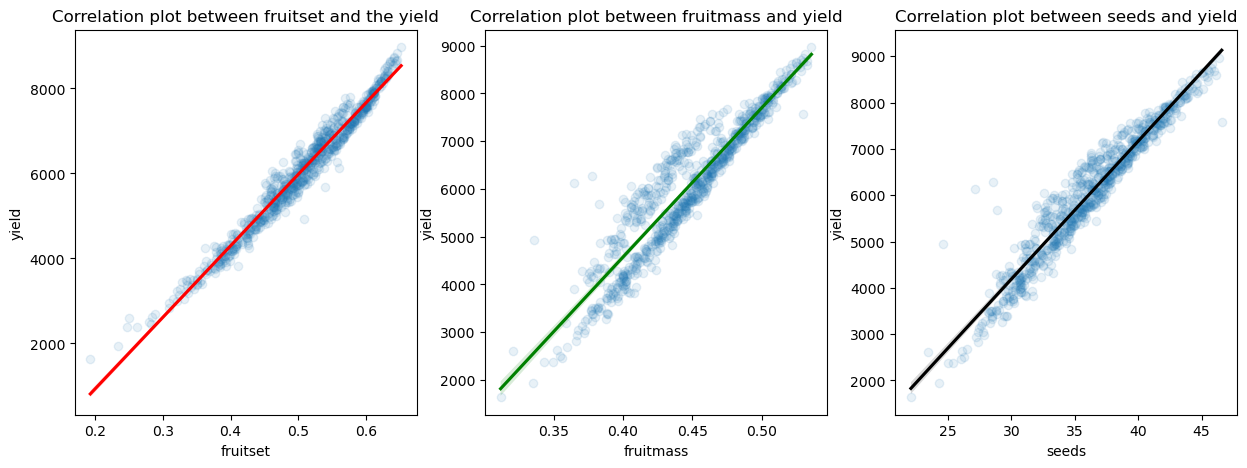

In [91]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.regplot(data=initial_df, x="fruitset",y="yield",ax=ax[0],line_kws={"color":'r'},scatter_kws={"alpha":0.1})
ax[0].set_title("Correlation plot between fruitset and the yield")

sns.regplot(data=initial_df, x="fruitmass",y="yield",ax=ax[1],line_kws={"color":'g'},scatter_kws={"alpha":0.1})
ax[1].set_title("Correlation plot between fruitmass and yield")

sns.regplot(data=initial_df, x = "seeds", y="yield",ax=ax[2], line_kws={"color":'k'},scatter_kws={"alpha":0.1})
ax[2].set_title("Correlation plot between seeds and yield")

plt.show()

Looking into the fruit mass and the yield also reveals that there are two groups from which the data was created from: 

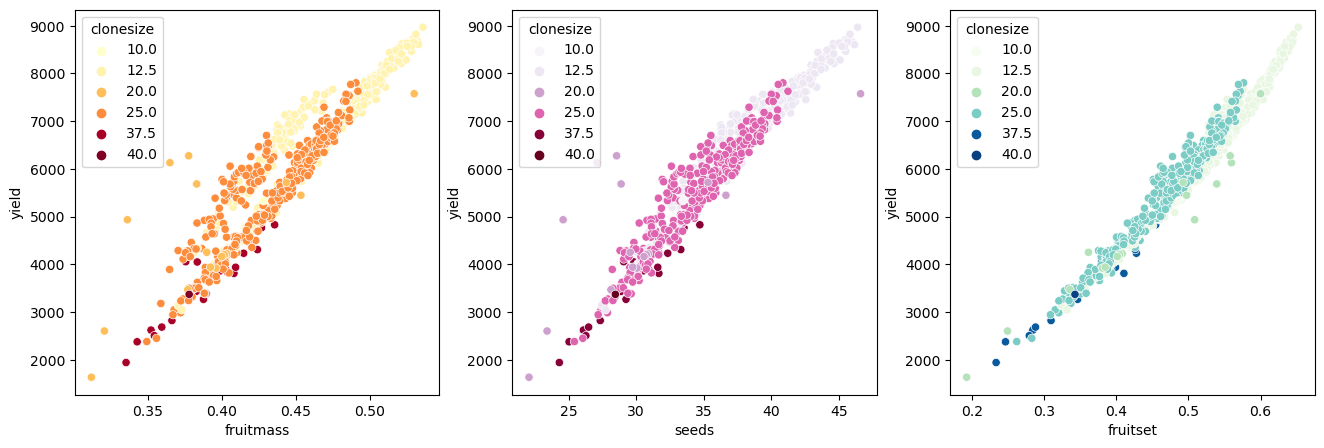

In [113]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.scatterplot(x="fruitmass",y="yield",data=initial_df, hue="clonesize",palette="YlOrRd")
plt.legend(title="clonesize", loc="upper left")

plt.subplot(1,3,2)
sns.scatterplot(data=initial_df, x="seeds",y="yield",hue="clonesize",palette="PuRd")
plt.legend(title="clonesize",loc="upper left")


plt.subplot(1,3,3)
sns.scatterplot(data=initial_df, x="fruitset",y="yield",hue="clonesize",palette="GnBu")
plt.legend(title="clonesize",loc="upper left")
plt.show()

#### Outlier detection and removal

Outliers are values that appear to be different from the other values in the dataset.

This might point to the an error during data entry of faulty measuring device.

The effect of these outliers is that they impact linear models and also affect the weights given to the mean errors such as MAE and RMSE.

In [118]:
## Using standard deviation method for outlier detection

mean = np.mean(initial_df["yield"])
std_dev = np.std(initial_df["yield"])
threshold = 2.5
outliers = []
for dt in initial_df["yield"]:
    if abs(dt - mean) > threshold * std_dev:
        outliers.append(dt)
        
print(outliers)        

[2379.905214, 2508.375673, 1945.530615, 2384.728916, 2452.680747, 1637.704022, 2605.696759]


This method is not so effecient because we cannot be able to support the choice of the threshold selected.

##### Using the Interquantile Range method: (Box-plot)

In [137]:
"""
Any value above the upper bound and below tehe lower bound is considered to be an outlier
"""
def remove_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - (1.5* iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
        return df

###### Visualizing using box-plots

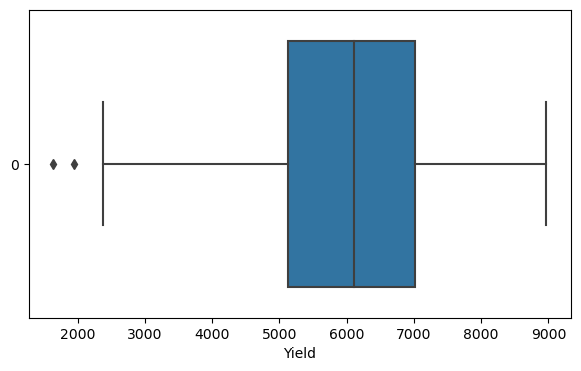

In [131]:
fig,ax = plt.subplots(figsize=(7,4))
sns.boxplot(data=initial_df["yield"],ax=ax,orient="h")
plt.xlabel("Yield")
plt.show()

In [138]:
original_df = remove_outliers(initial_df,["yield"])

## Splitting data into Training and Test set

In [147]:
from sklearn.model_selection import train_test_split

In [146]:
##### Drop the features that have a high correlation:

original_df = original_df.drop(["fruitset","fruitmass","seeds","log_honeybee"],axis=1)
X = original_df.drop(["yield"],axis=1)
Y = original_df[["yield"]]

In [148]:
X_train,  X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [149]:
##### Save the X_test and y_test completely 
X_train.to_csv("../data/X_train.csv")
X_test.to_csv("../data/X_test.csv")
y_test.to_csv("../data/y_test.csv")
y_train.to_csv("../data/y_train.csv")

### Transforming the features using a standard scaler

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV

In [152]:
num_columns = list(X_train.columns)

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_columns )
])

In [157]:
X_train = full_pipeline.fit_transform(X_train)

### Training Models and validation of models
    
1. Linear Regression Model
 
    
2. XGBoost Regressor


3. Random Forest Regressor

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score

##### Bias-variance trade-off ?

In [ ]:
def baseline_train_data(X_train, y_train, **kwargs):
    scores = {}
    models = []
    bvd = {}
    
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = xgb.XGBRegressor()
        